# Course:CSCI 5415 Data Mining
# Group Name: KAPPA
# Group Project Milestone - Phase 3: Data Collection 
# Group Members:
### --Carmen Avitia(cavitia@nmsu.edu)
### --Victoria Franco(vichol@nmsu.edu)
### --Daniela Pedroza Rodriguez( dgpedroz@nmsu.edu)
### --Ying Yang (yy0816@nmsu.edu)

## Data Source: 
### -- Global Super Store Dataset: https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset/data
### -- Ecommerce Consumer Behavior Dataset: https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023/data
## Created by: Victoria Franco
## Followed by: Ying Yang, Carmen Avitia
## Created on: 9/15/2025

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
# For Global Superstore
#df = pd.read_csv("Global_Superstore2.csv", encoding="latin1")

In [3]:
# For Consumer Behaviour 
df = pd.read_csv("ECommerce_consumer behaviour.csv",encoding="latin1" )

In [4]:
# Basic Exploration
print("Shape:", df.shape)

Shape: (2019501, 12)


In [5]:

print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2425083    49125             1          2                 18   
1   2425083    49125             1          2                 18   
2   2425083    49125             1          2                 18   
3   2425083    49125             1          2                 18   
4   2425083    49125             1          2                 18   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN          17                  1          0   
1                     NaN          91                  2          0   
2                     NaN          36                  3          0   
3                     NaN          83                  4          0   
4                     NaN          83                  5          0   

   department_id  department        product_name  
0             13      pantry  baking ingredients  
1             16  dairy eggs     soy lactosefre

In [6]:
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
department_id               int64
department                 object
product_name               object
dtype: object


In [7]:
print("\n--- Null Counts ---")
print(df.isna().sum())


--- Null Counts ---
order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64


In [8]:
# check if has duplicated values
df.duplicated().sum()

np.int64(0)

In [9]:
# find unique values
#df.nunique()

In [10]:
print("\n--- Summary (Numeric) ---")
print(df.describe())


--- Summary (Numeric) ---
           order_id       user_id  order_number     order_dow  \
count  2.019501e+06  2.019501e+06  2.019501e+06  2.019501e+06   
mean   1.707013e+06  1.030673e+05  1.715138e+01  2.735367e+00   
std    9.859832e+05  5.949117e+04  1.752576e+01  2.093882e+00   
min    1.000000e+01  2.000000e+00  1.000000e+00  0.000000e+00   
25%    8.526490e+05  5.158400e+04  5.000000e+00  1.000000e+00   
50%    1.705004e+06  1.026900e+05  1.100000e+01  3.000000e+00   
75%    2.559031e+06  1.546000e+05  2.400000e+01  5.000000e+00   
max    3.421080e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       2.019501e+06            1.895159e+06  2.019501e+06   
mean        1.343948e+01            1.138603e+01  7.120590e+01   
std         4.241008e+00            8.970980e+00  3.820727e+01   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  3.10000

In [11]:
print("\n--- Summary (Categorical) ---")
print(df.describe(include="O"))


--- Summary (Categorical) ---
       department  product_name
count     2019501       2019501
unique         21           134
top       produce  fresh fruits
freq       588996        226039


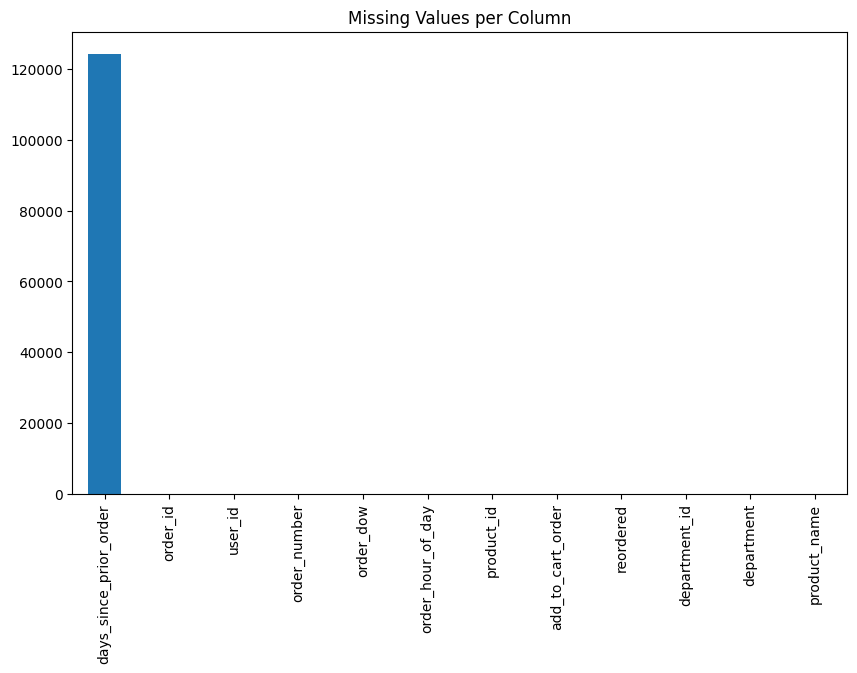

In [12]:
# Missing Values Visualization
plt.figure(figsize=(10,6))
df.isna().sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Missing Values per Column")
plt.show()

## --------------> Handling Missing Values

In [13]:
# Drop Postal Code if it exists
if "Postal Code" in df.columns:
    df.drop("Postal Code", axis=1, inplace=True)

# Drop days_since_prior_order if it exists
if "days_since_prior_order" in df.columns:
    df["days_since_prior_order"] = df["days_since_prior_order"].fillna(df["days_since_prior_order"].median())   #fill with median

# Check missing values
print(df.isnull().sum())


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64


In [14]:
# Unique Values
for col in df.select_dtypes(include="object").columns[:]:  # limit to first 10 for brevity
    print(f"{col}: {df[col].nunique()} unique values")

department: 21 unique values
product_name: 134 unique values


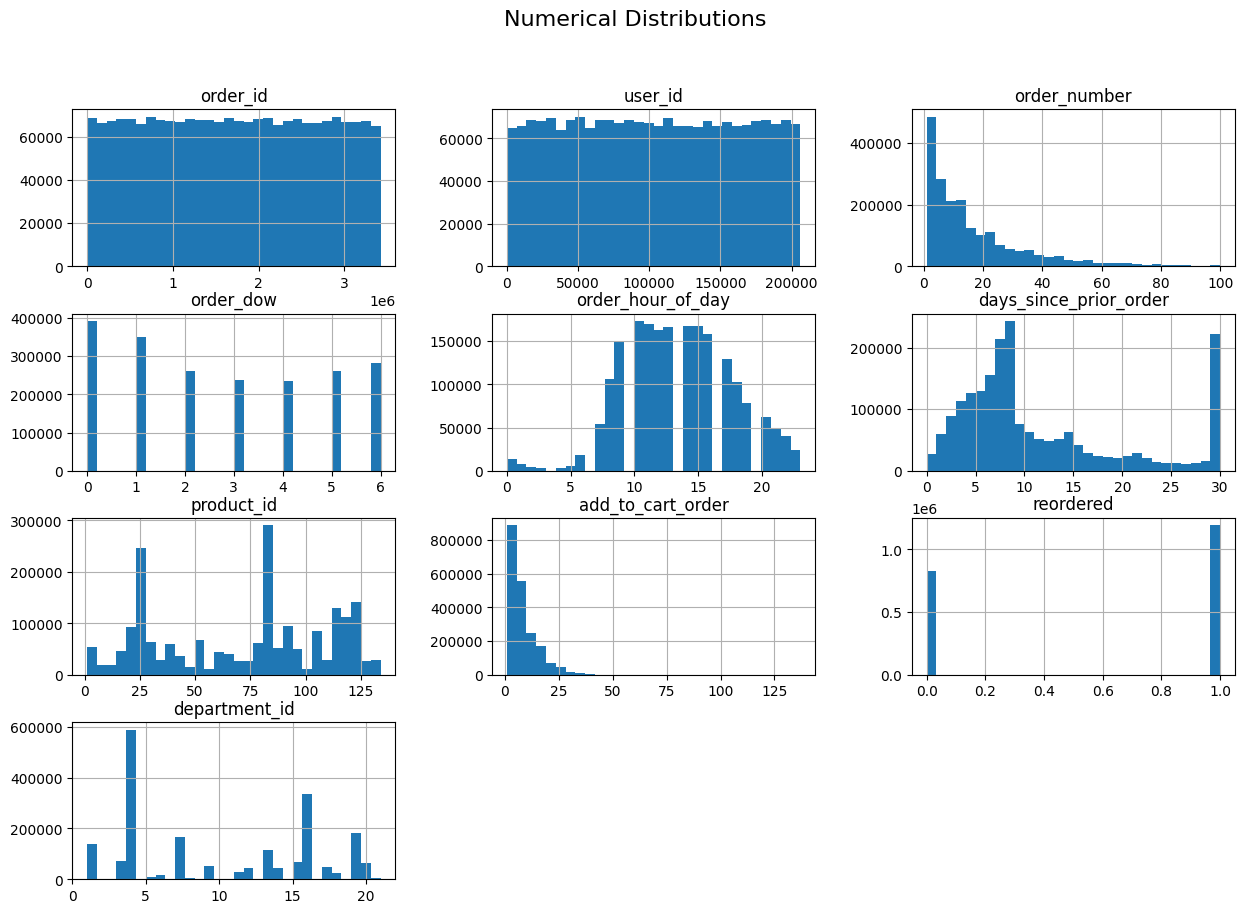

In [15]:
# Distributions of Numerical Features
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Numerical Distributions", fontsize=16)
plt.show()

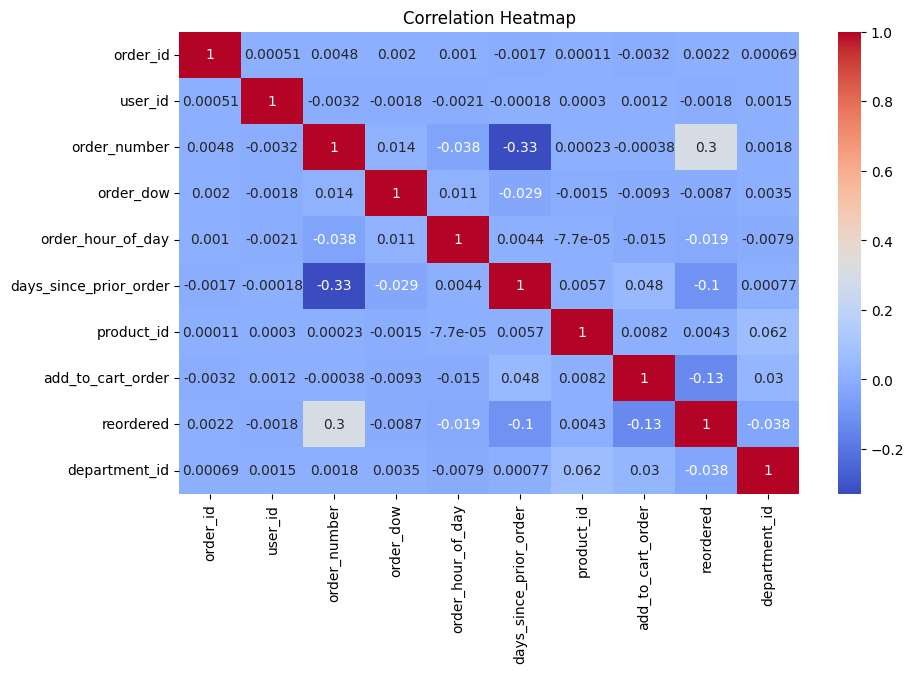

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## ------------analysis of Global supermarker dataset---------------------------------

In [28]:
# 8. Categorical Exploration
if "Category" in df.columns:
    plt.figure(figsize=(8,5))
    df.groupby("Category")["Sales"].sum().sort_values().plot(kind="barh")
    plt.title("Sales by Category")
    plt.show()

In [18]:
if "Sub-Category" in df.columns:
    plt.figure(figsize=(8,5))
    df.groupby("Sub-Category")["Sales"].sum().sort_values().plot(kind="barh")
    plt.title("Sales by Sub-Category")
    plt.show()

In [19]:
# Time-Based Analysis
if "Order Date" in df.columns:
    df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce", dayfirst=True)
    monthly_sales = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()
    monthly_sales.plot(figsize=(12,5))
    plt.title("Monthly Sales Trend")
    plt.ylabel("Total Sales")
    plt.show()

    # --------------> Identify which weekdays customers prefer to purchase items <-------------------.
    
    # Extract the weekday
    # 0 = Monday, 6 = Sunday
    df['Order Weekday'] = df['Order Date'].dt.weekday  
    
    # Optional: get weekday names
    df['Order Weekday Name'] = df['Order Date'].dt.day_name()

    #Overall order count per weekday
    weekday_counts = df['Order Weekday Name'].value_counts().sort_index()
    plt.figure(figsize=(8,4))
    sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
    plt.title("Number of Orders by Weekday")
    plt.ylabel("Number of Orders")
    plt.xticks(rotation=45)
    plt.show()

    # --------------------> Analyze the distribution of days since customers’ prior orders -----------------------------
    # Sort orders by customer and date
    df = df.sort_values(['Customer ID', 'Order Date'])
    
    # Calculate days since previous order
    df['days_since_prior_order'] = df.groupby('Customer ID')['Order Date'].diff().dt.days
    
    # Handle the first order
    ## The first order for each customer will have NaN because there is no previous order. Fill it with 0 or leave as NaN:
    df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)
    
    # Distribution of days between orders:
    
    plt.figure(figsize=(8,4))
    sns.histplot(df['days_since_prior_order'], bins=120, kde=True)
    plt.title("Days Since Prior Order")
    plt.xlabel("Days")
    plt.show()

# ----------Analysis of Monthly Sales Trend -------------
## From the graph, we can see that the overall sales trend is upward, but there are some dips at certain points, such as in February 2012, 2013, and 2014.
# ----------Analysis of Orders by Weekday----------------
## From the figure, we can see that customers are more likely to purchase products on weekdays rather than weekends, with Saturday performing better than Sunday. In particular, customers tend to make purchases on Fridays and Tuesdays.

# ------Analysis of Days Since Prior Order---------------
## Through the analysis of days since prior order, we find that most customers tend to reorder products within 30 days, especially within 10 days. This pattern suggests that many consumers follow a weekly or monthly shopping routine.

In [20]:
# Analyze average shipping days by shipping method (ship mode)

if "Order Date" in df.columns and "Ship Date" in df.columns:
    # Convert dates to datetime
    df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
    
    # Calculate shipping days
    df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
    
    # Summary statistics
    shipmode_stats = df.groupby('Ship Mode')['Shipping Days'].describe()
    # print(shipmode_stats)
    
    # Get average shipping days
    avg_shipdays = df.groupby('Ship Mode')['Shipping Days'].mean().sort_values()
    avg_shipdays.plot(kind='bar', color="skyblue", figsize=(8,4), title="Average Shipping Days by Ship Mode")
    plt.ylabel("Average Days")
    plt.show()



## --------Comment on ship mode--------
## Through the analysis of average shipping days by ship mode, we find that First Class takes 2.5 days, Second Class takes 3.5 days, and Standard Class takes 5 days. As the next step, we can encode or apply one-hot encoding to label these classes in order to explore their relationship with customer purchase behavior.

In [21]:
# --------------------> Create a pie chart showing the distribution of orders by order ranges and by weekdays <-------------------------

if "Customer ID" in df.columns and "Order ID" in df.columns:

    # Example: number of orders per customer
    customer_orders = df.groupby('Customer ID')['Order ID'].nunique()
    
    # Define ranges
    bins = [0, 1, 3, 5, 10, 20, 100]  # adjust as needed
    labels = ['1', '2-3', '4-5', '6-10', '11-20', '21+']
    
    customer_orders_range = pd.cut(customer_orders, bins=bins, labels=labels, right=True)
    
    # Count customers in each range
    range_counts = customer_orders_range.value_counts().sort_index()
    
    # Plot pie chart by orders
    plt.figure(figsize=(8,8))
    plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Customer Orders Divided into Ranges")
    plt.show()
    
    
    # PLot by weekday
    plt.figure(figsize=(8,8))
    patches, texts, autotexts = plt.pie(
        weekday_counts,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel")
    )
    plt.title("Number of Orders by Weekday")
    plt.legend(patches, weekday_counts.index, loc="best")
    plt.show()

## Analysis of the Pie Plots
### 42.9% of customers place more than 21 orders, while 17.4% of customers place between 6 and 10 orders.
### Regarding weekdays, 18.2% of orders occur on Friday and 18.1% on Tuesday, whereas Sunday accounts for only 1.9%.

In [22]:
# -----------------> # Identify the top 20 and bottom 10 most frequently ordered products <--------------------------------

if "Category" in df.columns:

    # Count number of orders per product
    product_counts = (
        df.groupby(['Product Name', 'Category'])['Order ID']
        .count()
        .reset_index()
        .rename(columns={'Order ID':'Order Count'})
    )
    
    # Sort for top and bottom products
    top_n = 20
    bottom_n = 10
    top_products = product_counts.sort_values('Order Count', ascending=False).head(top_n)
    bottom_products = product_counts.sort_values('Order Count', ascending=True).head(bottom_n)
    
    # Create a figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
    
    # Top products plot
    sns.barplot(
        data=top_products,
        x='Order Count',
        y='Product Name',
        hue='Category',
        dodge=False,
        ax=axes[0]
    )
    axes[0].set_title(f"Top {top_n} Most Frequently Ordered Products by Category")
    axes[0].set_xlabel("Number of Orders")
    axes[0].set_ylabel("Product Name")
    axes[0].legend(title="Category")
    
    # Bottom products plot
    sns.barplot(
        data=bottom_products,
        x='Order Count',
        y='Product Name',
        hue='Category',
        dodge=False,
        ax=axes[1]
    )
    axes[1].set_title(f"Bottom {bottom_n} Least Frequently Ordered Products by Category")
    axes[1].set_xlabel("Number of Orders")
    axes[1].set_ylabel("Product Name")
    axes[1].legend(title="Category")
    
    plt.tight_layout()
    plt.show()



## Top and Bottom 20 Most Frequently Ordered Products
### The top 20 most frequently ordered products are mainly from the Office Supplies category, followed by Technology. In contrast, the bottom 10 most frequently ordered products are primarily from Technology and Office Supplies.

## ------------------ Analysis of Ecommerce behavior dataset-------------------------

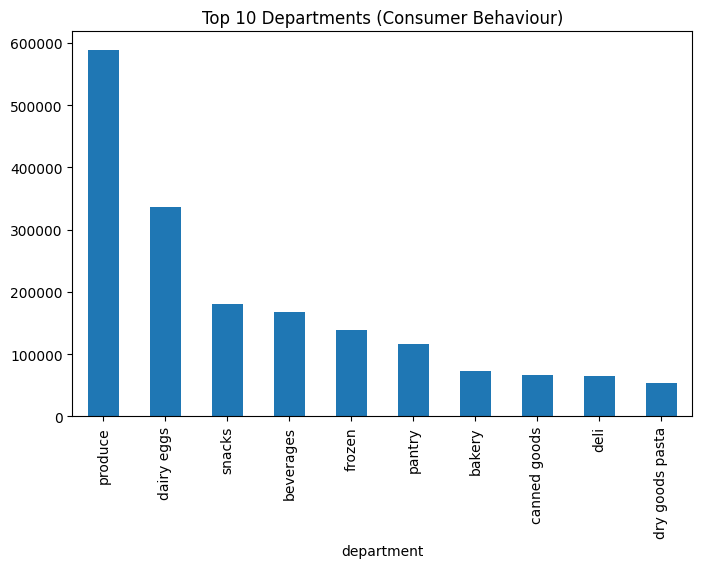

In [23]:

if "department" in df.columns:
    plt.figure(figsize=(8,5))
    df["department"].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 Departments (Consumer Behaviour)")
    plt.show()

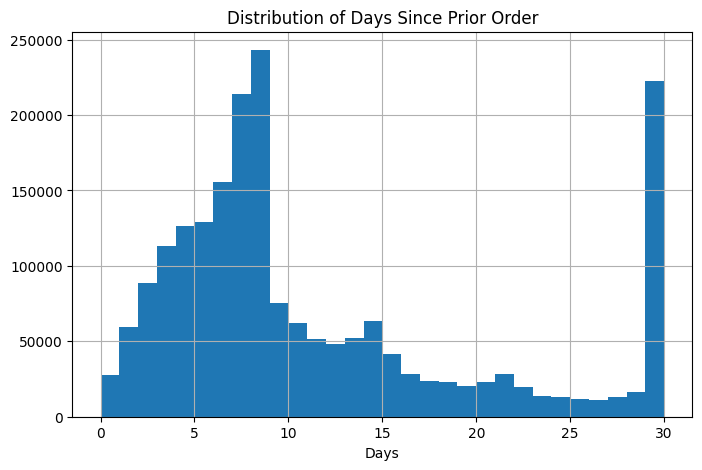

In [24]:
# Customer Behavior (Consumer Behaviour dataset)
if "days_since_prior_order" in df.columns:
    plt.figure(figsize=(8,5))
    df["days_since_prior_order"].dropna().hist(bins=30)
    plt.title("Distribution of Days Since Prior Order")
    plt.xlabel("Days")
    plt.show()

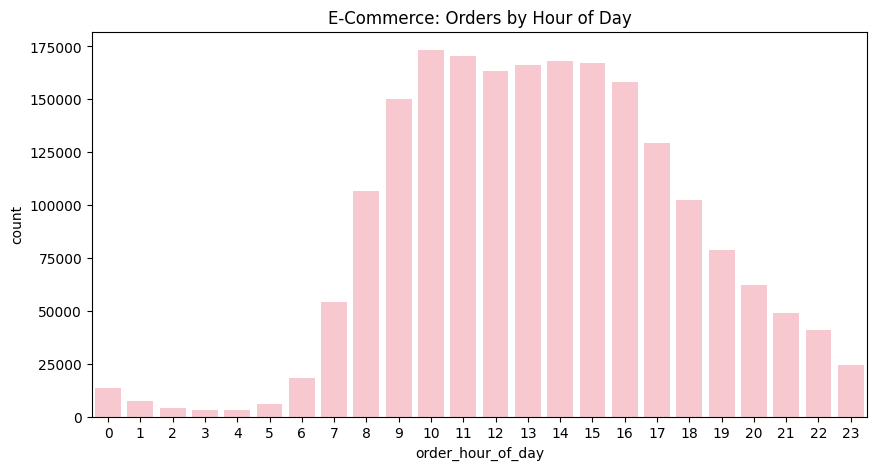

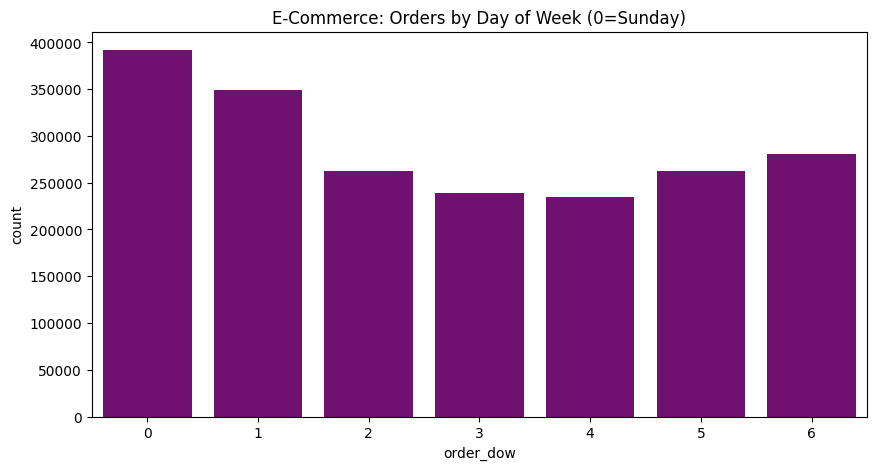

In [25]:
if "order_hour_of_day" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x="order_hour_of_day", data=df, color="pink")
    plt.title("E-Commerce: Orders by Hour of Day")
    plt.show()

# 0 = Sunday
if "order_dow" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x="order_dow", data=df, color="purple")
    plt.title("E-Commerce: Orders by Day of Week (0=Sunday)")
    plt.show()

Reorder Rate: 58.97%


/var/folders/z2/rtypw2fd26s5_92psfg7k85w0000gn/T/ipykernel_15232/328627986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


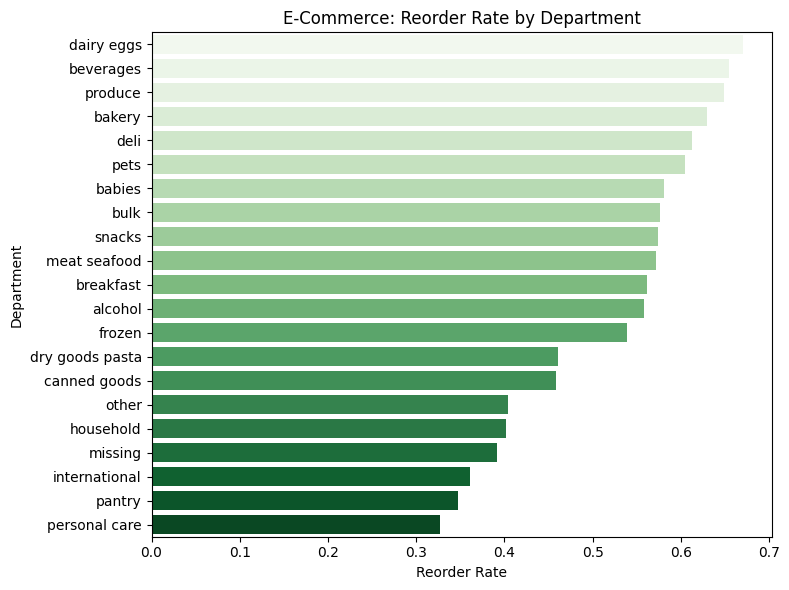

In [26]:
if "reordered" in df.columns:
    reorder_rate = df["reordered"].mean()
    print(f"Reorder Rate: {reorder_rate:.2%}")

# --- E-Commerce: Reorder rate per department ---
    ecom_dept = df.groupby("department")["reordered"].mean().reset_index()
    ecom_dept.rename(columns={"reordered": "Reorder_Rate"}, inplace=True)

# --- Plot ---
    plt.figure(figsize=(8,6))
    sns.barplot(
        data=ecom_dept.sort_values("Reorder_Rate", ascending=False),
        x="Reorder_Rate", 
        y="department", 
        palette="Greens"
    )
    
    plt.title("E-Commerce: Reorder Rate by Department")
    plt.xlabel("Reorder Rate")
    plt.ylabel("Department")
    plt.tight_layout()
    plt.show()


# -----------------------------------------------------------------------------------------------------------
# Visualizes outliers before and after capping using boxplots for all numerical columns
## Outliers were capped at a reasonable threshold (e.g., using IQR or percentile limits) 
## to observe their behavior without removing them completely from the dataset.

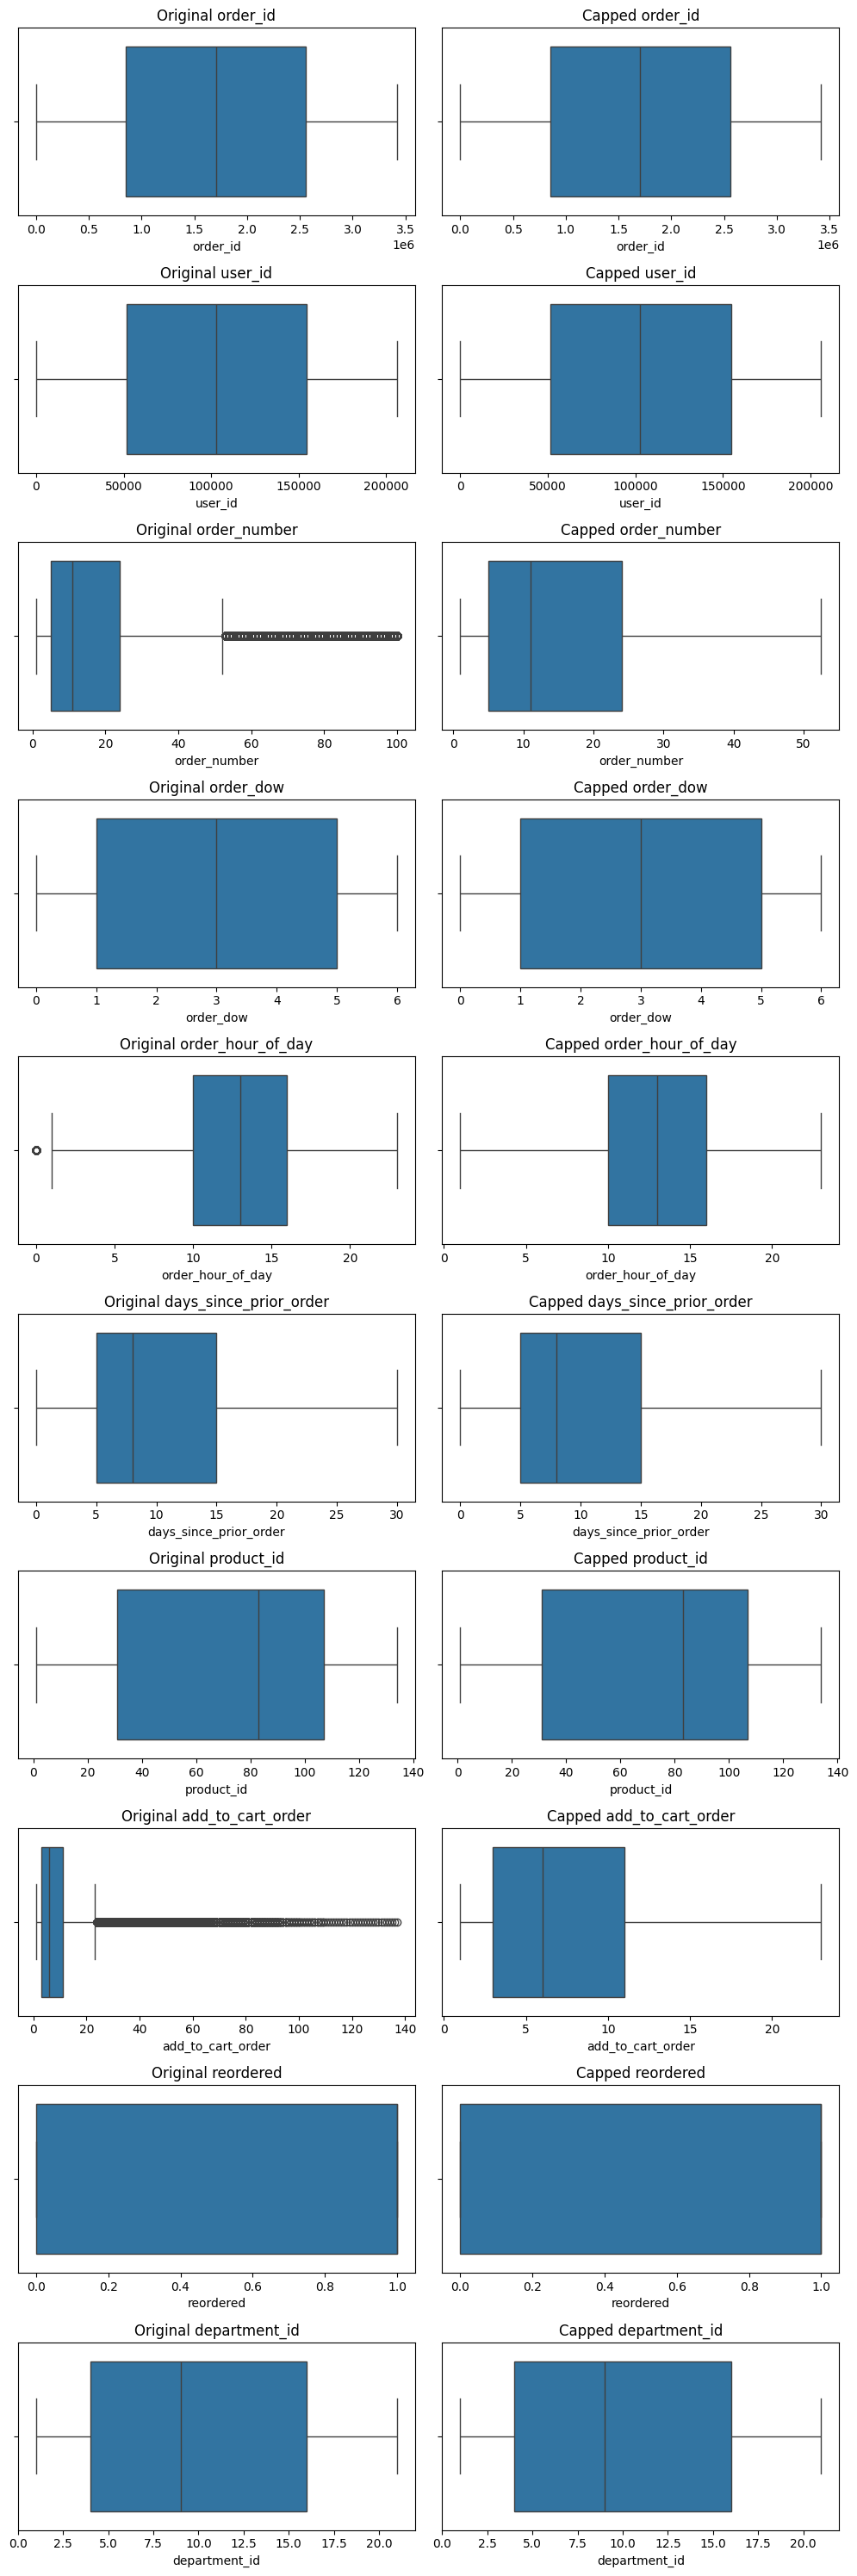

In [27]:

# Function to cap outliers using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series > upper, upper, np.where(series < lower, lower, series))

# -----------------------------
# Create capped dataframe
df_capped = df.copy()
for col in num_cols:
    df_capped[col] = cap_outliers(df[col])

# -----------------------------
# Plot boxplots before and after capping
plt.figure(figsize=(10, len(num_cols)*3))

for i, col in enumerate(num_cols, 1):
    # Before capping
    plt.subplot(len(num_cols), 2, 2*i-1)
    sns.boxplot(x=df[col])
    plt.title(f'Original {col}')
    
    # After capping
    plt.subplot(len(num_cols), 2, 2*i)
    sns.boxplot(x=df_capped[col])
    plt.title(f'Capped {col}')

plt.tight_layout()
plt.show()


## Outliers were not removed in this analysis. Instead, they were handled using robust techniques such as log transformation, median/IQR-based statistics, and robust scaling to reduce their influence. This approach ensures that extreme values are retained for analysis (since they may represent important business cases like high-value customers) while minimizing their distortion on overall results.